# [2022 Fall] Assignment4-1

> Course: AP3021

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os

### 4-1.1:

Locate the first nontrivial root of $sin(x) = x^3$ where x is in radians. 
1. Graphical technique (Python)
2. Bisection program (𝑥𝑙 = 0.5, 𝑥𝑢 = 1, 𝑤h𝑒𝑛 𝜀𝑎 < 𝜀𝑠 = 2%) (Python)


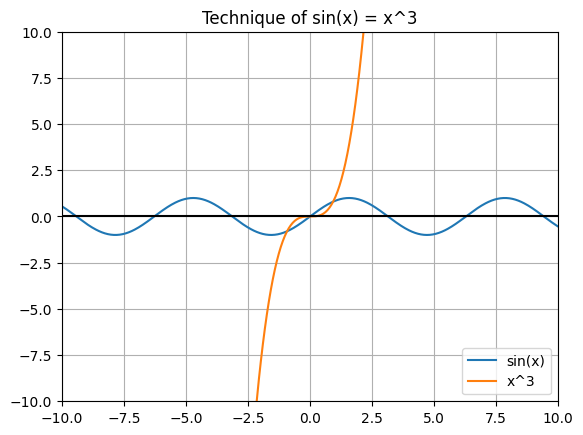

In [2]:
# plot y = sin(x) and y = x^3

x = np.linspace(-10, 10, 500)
y1 = np.sin(x)
y2 = x ** 3

plt.plot(x, y1)
plt.plot(x, y2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title("Technique of sin(x) = x^3")
plt.grid()
plt.legend(["sin(x)", "x^3"], loc ="lower right")
plt.axhline(y = 0, color='k', linestyle='-')

# plt.savefig("./src/imgs/A4_1_a-1.png", dpi=300)

plt.show()

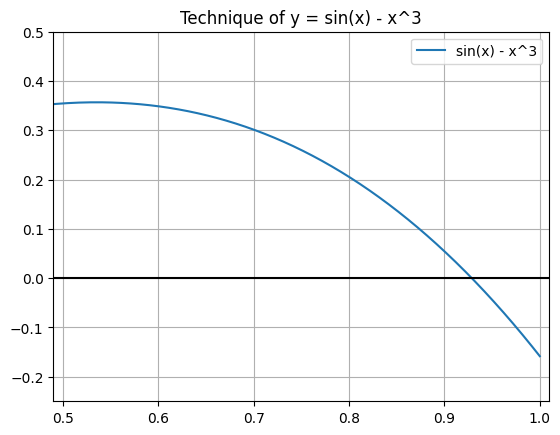

In [3]:
# plot y = sin(x) - x ^ 3
# set xl = 0.5; xu = 1.0

x = np.linspace(0.0, 1.0, 500)
y = np.sin(x) - x ** 3

plt.plot(x, y)

plt.xlim(0.49, 1.01)
plt.ylim(-0.25, 0.5)

plt.title("Technique of y = sin(x) - x^3")
plt.grid()
plt.legend(["sin(x) - x^3"], loc ="upper right")
plt.axhline(y = 0, color='k', linestyle='-')

# plt.savefig("./src/imgs/A4_1_a-2.png", dpi=300)

plt.show()

In [4]:
# Bisection Program

def f(x) :
    ans = np.sin(x) - x ** 3
    return ans

def count_ea(new_x_root, old_x_root) :

    if (old_x_root == -1) : # jump out the first data.
        return 9999
    else :
        ea = abs((new_x_root - old_x_root) / new_x_root)
        ea = ea * 100   # turn into percent
    
    return ea

def bisection(x_lowwer, x_upper, es, x_root, iter_max) :
    iter_count = 0
    
    while True :
        last_x_root = x_root
        x_root = (x_lowwer + x_upper) / 2
        iter_count += 1
        ea = count_ea(x_root, last_x_root)
        temp = f(x_lowwer) * f(x_root)

        if (temp < 0) :
            x_upper = x_root
        elif(temp > 0) :
            x_lowwer = x_root
        else :
            ea = 0.0    
            # return x_root

        print("count:", iter_count, "root:", x_root, "ea:", ea)
        
        if ea < es or iter_count >= iter_max:
            return x_root

In [5]:
es = 2.0  # 2%
x_lowwer = 0.5
x_upper = 1.0
x_root = -1
iter_max = 500

ans = bisection(x_lowwer, x_upper, es, x_root, iter_max)

print("\nThe approximate ans:", ans)

count: 1 root: 0.75 ea: 9999
count: 2 root: 0.875 ea: 14.285714285714285
count: 3 root: 0.9375 ea: 6.666666666666667
count: 4 root: 0.90625 ea: 3.4482758620689653
count: 5 root: 0.921875 ea: 1.694915254237288

The approximate ans: 0.921875


## 4-1.2

Also perform an error check by substituting your final answer into the original equation in 1-2 (calculate true error 可不用打程式)

In [6]:
# Also perform an error check by substituting your final answer into the original equation in (b) 

def count_true_error(true_value, approximation) :
    return true_value - approximation

def count_et(true_value, approximation) :
    true_error = true_value - approximation
    et = (true_error / true_value) * 100

    return et

true_value = 0.9286263  # calculator

et = count_et(true_value, ans)
print("True error:", et)

True error: 0.7270201156267075


### from the calculator

The root of $y = sin(x) - x^3$ is $−0.9286263, 0, 0.9286263$

![plot](./src/imgs/A4_1_b.png)

And from the previous conduction, true value is $0.9286263$ and the approximation is $0.7421875$.

Therefore we get the true percent error is $20.07683822868252\%$